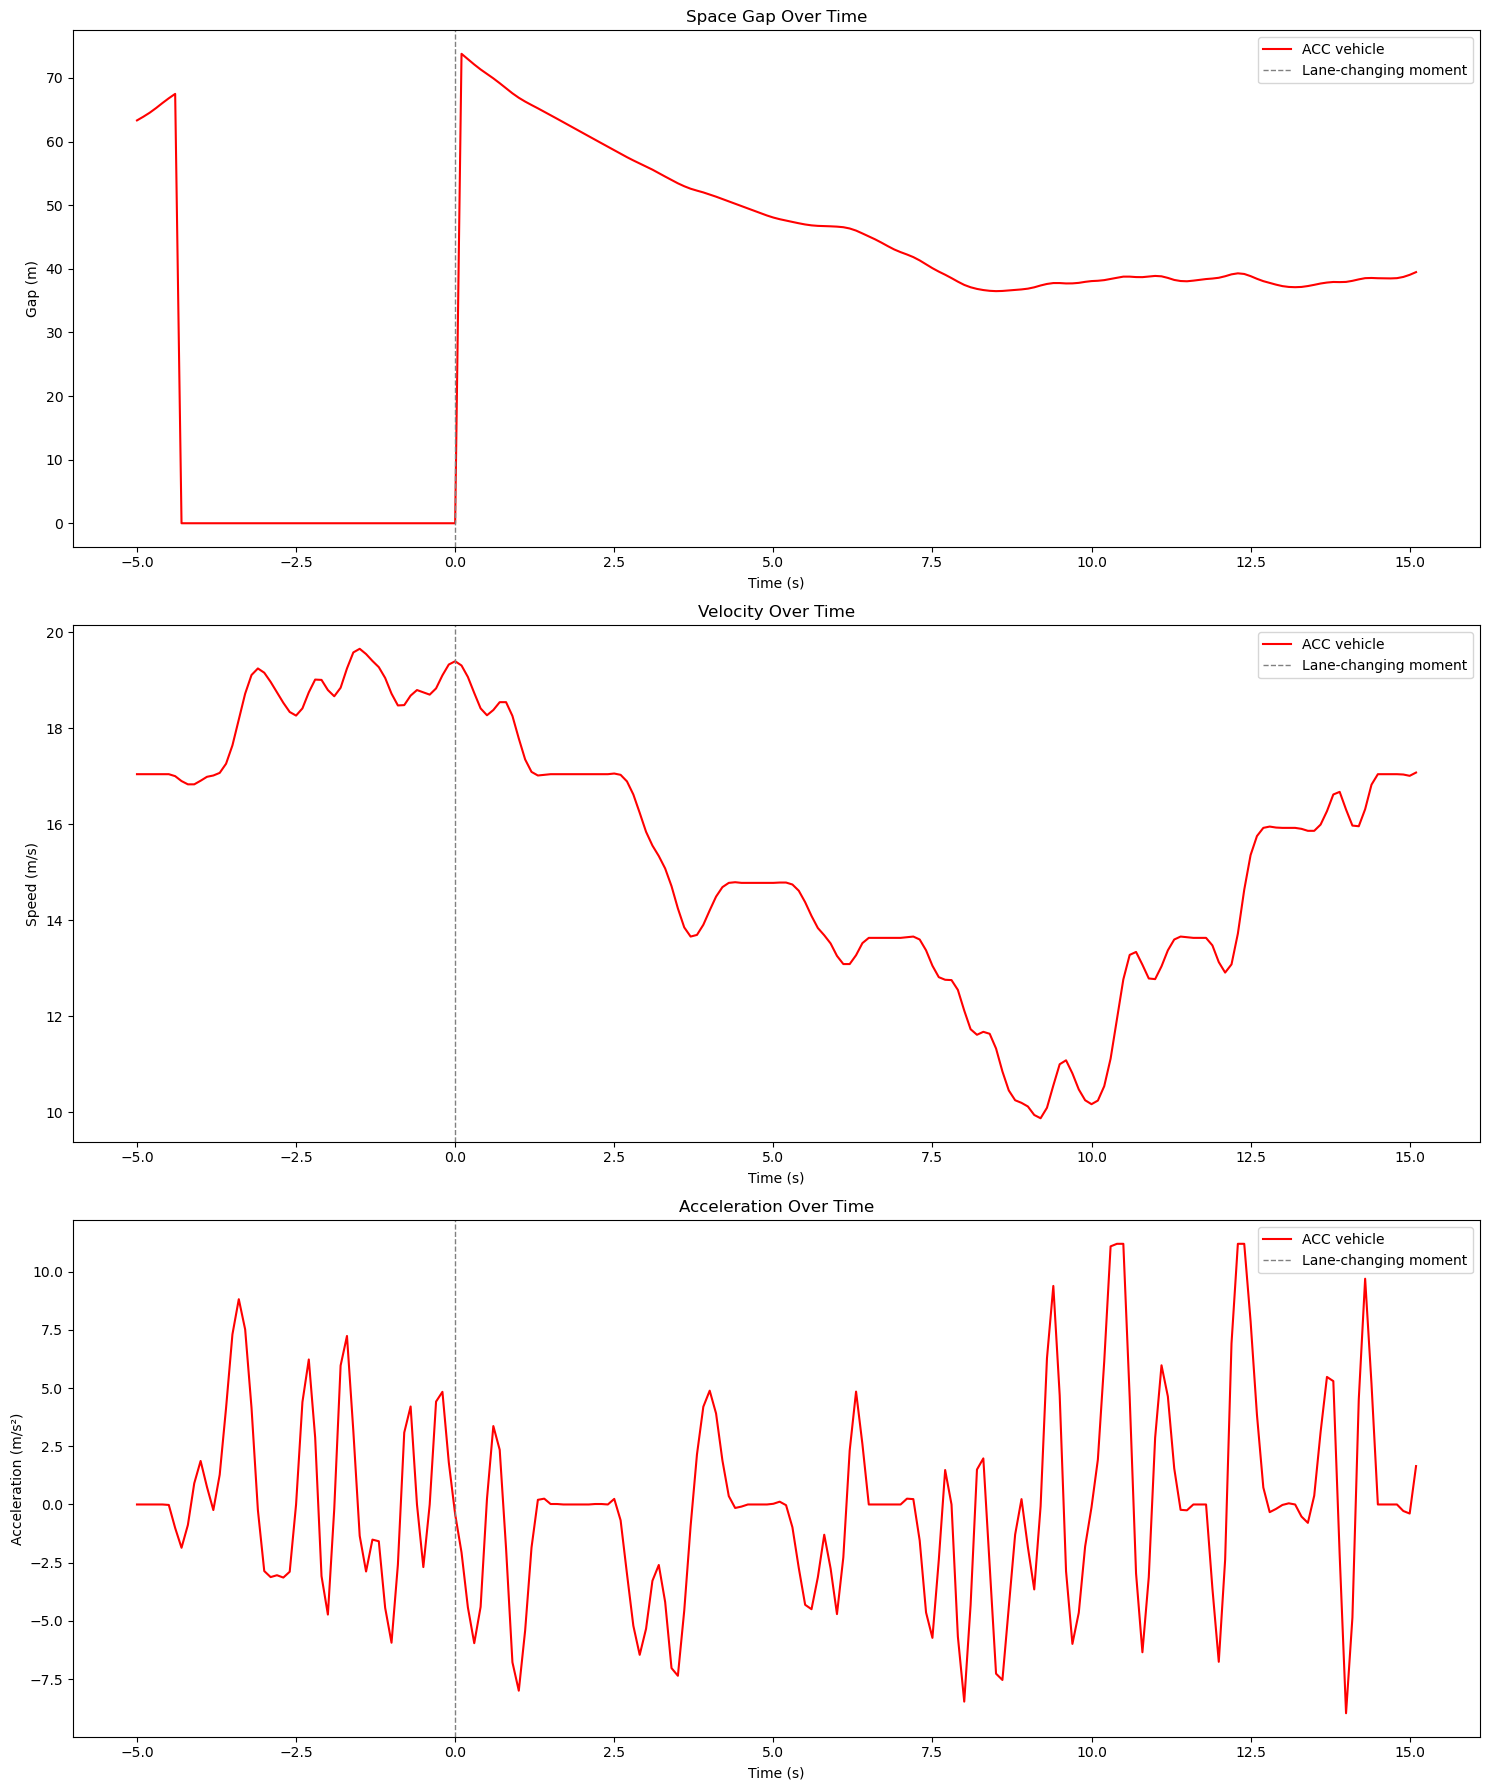

In [2]:
import matplotlib.pyplot as plt
import json

def load_detailed_after_following(file_path):
    with open(file_path, 'r') as f:
        return [json.loads(line) for line in f]

def plot_vehicle_influence(plot_data):
    # 校正 timestamps
    before_change_timestamp = plot_data['before_change_timestamp']
    timestamps = [ts - before_change_timestamp for ts in plot_data['timestamps']]
    
    gaps = plot_data['gaps']
    accs = plot_data['accs']
    vels = plot_data['vels']

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18))

    # 绘制车距间隔图 (t-s)
    ax1.plot(timestamps, gaps, label='ACC vehicle', color='red')
    ax1.axvline(x=0, color='grey', linestyle='--', linewidth=1, label='Lane-changing moment')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Gap (m)')
    ax1.set_title('Space Gap Over Time')
    ax1.legend()

    # 绘制速度图 (t-v)
    ax2.plot(timestamps, vels, label='ACC vehicle', color='red')
    ax2.axvline(x=0, color='grey', linestyle='--', linewidth=1, label='Lane-changing moment')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Speed (m/s)')
    ax2.set_title('Velocity Over Time')
    ax2.legend()

    # 绘制加速度图 (t-a)
    ax3.plot(timestamps, accs, label='ACC vehicle', color='red')
    ax3.axvline(x=0, color='grey', linestyle='--', linewidth=1, label='Lane-changing moment')
    ax3.set_xlabel('Time (s)')
    ax3.set_ylabel('Acceleration (m/s²)')
    ax3.set_title('Acceleration Over Time')
    ax3.legend()

    plt.tight_layout()
    plt.show()

# 加载和准备数据
detailed_file = 'trajectories-0400-0415-detailed-after-following.json'
data = load_detailed_after_following(detailed_file)

# 只绘制第一个变道事件的图像
if data:
    plot_vehicle_influence(data[0])